Based on _Hogg, Bovy & Lang (2010)_ Section 1: Standard Practise (p. 3)

In [1]:
import numpy as np
import os
import pkg_resources
import hblfit.data as dat
import matplotlib.pyplot as plt

Import Table 1 (HBL 2010 p. 6) from file.

In [2]:
table_1 = dat.get_table(1)
table_1

id,x,y,sigma_y,sigma_x,rho_xy
int64,int64,int64,int64,int64,float64
1,201,592,61,9,-0.84
...,...,...,...,...,...
19,218,533,16,6,-0.78
20,146,344,22,5,-0.56


# Exercise 1

__Using the standard linear algebra method of this Section, fit the straight line $y = mx + b$ to the $x$, $y$, and $σ_y$ values for data points 5 through 20 in Table 1 on page 6. That is, ignore the first four data points, and also ignore the columns for $σ_x$ and $ρ_{xy}$. Make a plot showing the points, their uncertainties, and the best-fit line. Your plot should end up looking like Figure 1. What is the standard uncertainty variance $σ^2_m$
on the slope of the line?__

In [3]:
table_exercise_1 = table_1[4:]
x = np.array(table_exercise_1["x"])
y = np.array(table_exercise_1["y"])
sigma_y = np.array(table_exercise_1["sigma_y"])

First, we set up $\mathbf{A}$ and $\mathbf{A}^\mathrm{T}$ according to __Equation 3__:

In [4]:
A = np.ones((x.shape[0], 2))
A[:, 1] = x
A

array([[  1., 203.],
       [  1.,  58.],
       [  1., 210.],
       [  1., 202.],
       [  1., 198.],
       [  1., 158.],
       [  1., 165.],
       [  1., 201.],
       [  1., 157.],
       [  1., 131.],
       [  1., 166.],
       [  1., 160.],
       [  1., 186.],
       [  1., 125.],
       [  1., 218.],
       [  1., 146.]])

In [5]:
A_T = A.transpose()
A_T

array([[  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.],
       [203.,  58., 210., 202., 198., 158., 165., 201., 157., 131., 166.,
        160., 186., 125., 218., 146.]])

Let's set up the covariance matrix, and its inverse, according to __Equation 4__:

In [6]:
C = np.zeros((y.shape[0], y.shape[0]))
C_inverse = np.zeros((y.shape[0], y.shape[0]))
for i, sigma in enumerate(sigma_y):
    C[i, i] = sigma
    C_inverse[i, i] = 1 / sigma

Now find (b, m) according to __Equation 5__:

In [7]:
X = np.matmul(np.linalg.inv(np.matmul(A_T, np.matmul(C_inverse, A))), np.matmul(A_T, np.matmul(C_inverse, y)))
b, m = X
b, m

(33.45048482976745, 2.2213630039593824)

Here's our plot:

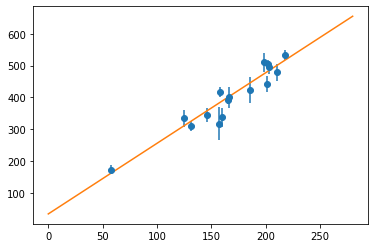

In [8]:
x_model = np.linspace(0, 280)
y_model = m * x_model + b
y_hat = m * x + b
fig, ax = plt.subplots(1, 1)
ax.errorbar(x, y, yerr=sigma_y, fmt='o')
ax.plot(x_model, y_model)

I am unsure if this is what the paper means by 'standard uncertainty variance', but this seems reasonable:

In [9]:
variance_m = np.sum(y - y_hat)**2 / len(y)
np.sqrt(variance_m)

21.586514975815327

Let's turn this into a function:

In [10]:
def linear_standard(x, y, sigma_y):
    # First, we set up matrix A according to Equation 3:
    A = np.ones((x.shape[0], 2))
    A[:, 1] = x
    A_T = A.transpose()
    # Let's set up the covariance matrix, and its inverse, according to Equation 4:
    C = np.zeros((y.shape[0], y.shape[0]))
    C_inverse = np.zeros((y.shape[0], y.shape[0]))
    for i, sigma in enumerate(sigma_y):
        C[i, i] = sigma
        C_inverse[i, i] = 1 / sigma
    # Now find (b, m) according to Equation 5:
    X = np.matmul(np.linalg.inv(np.matmul(A_T, np.matmul(C_inverse, A))), np.matmul(A_T, np.matmul(C_inverse, y)))
    b, m = X
    return b, m

# Exercise 2
__Repeat Exercise 1 but for all the data points in Table 1 on page 6. Your plot should end up looking like Figure 2. What is the standard uncertainty variance $σ^2_m$ on the slope of the line? Is there anything you don’t
like about the result? Is there anything different about the new points you have included beyond those used in Exercise 1?__

As above, but this time with the full data set:

0.8965818959896872 252.472028522875


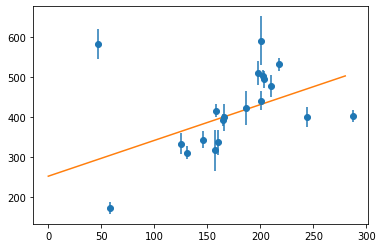

In [11]:
x = np.array(table_1["x"])
y = np.array(table_1["y"])
sigma_y = np.array(table_1["sigma_y"])

b, m = linear_standard(x, y, sigma_y)

y_model = m * x_model + b

fig, ax = plt.subplots(1, 1)
ax.errorbar(x, y, yerr=sigma_y, fmt='o')
ax.plot(x_model, y_model)

print(m, b)

# Exercise 3
__Generalize the method of this Section to fit a general quadratic (second order) relationship. Add another column to matrix $\mathbf{A}$ containing the values $x^2_i$, and another element to vector $\mathbf{X}$ (call it $q$). Then re-do Exercise 1 but fitting for and plotting the best quadratic relationship__

$g(x) = qx^2 +mx + b$ (8)

__Your plot should end up looking like Figure 3.__

In [12]:
table_exercise_1 = table_1[4:]
x = np.array(table_exercise_1["x"])
y = np.array(table_exercise_1["y"])
sigma_y = np.array(table_exercise_1["sigma_y"])

A = np.ones((x.shape[0], 3))
A[:, 1] = x
A[:, 2] = x**2
A_T = A.transpose()

C = np.zeros((y.shape[0], y.shape[0]))
C_inverse = np.zeros((y.shape[0], y.shape[0]))
for i, sigma in enumerate(sigma_y):
    C[i, i] = sigma
    C_inverse[i, i] = 1 / sigma

X = np.matmul(np.linalg.inv(np.matmul(A_T, np.matmul(C_inverse, A))), np.matmul(A_T, np.matmul(C_inverse, y)))
b, m, q = X

b, m, q

(81.9285779818747, 1.4469035120977196, 0.002719821530297928)

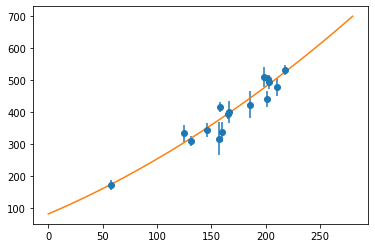

In [13]:
y_model = q * x_model ** 2 + m * x_model + b

fig, ax = plt.subplots(1, 1)
ax.errorbar(x, y, yerr=sigma_y, fmt='o')
ax.plot(x_model, y_model)